#Koneksi ke Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#IMPORT MODULE

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot
from sklearn import metrics
import matplotlib.pyplot as plt; plt.rcdefaults()

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from lightgbm import LGBMClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , confusion_matrix,f1_score, roc_auc_score,precision_score, recall_score,roc_curve

from datetime import date

MENAMPILKAN DATA DAN PENYESUAIAN SEBELUM MERGE

In [ ]:
patien_info = pd.read_csv('drive/MyDrive/dataset/PatientInfo.csv')
weather = pd.read_csv('drive/MyDrive/dataset/Weather.csv')
seoul_floating = pd.read_csv('drive/MyDrive/dataset/SeoulFloating.csv')

## Data Patien Info

In [ ]:
print(patien_info.shape)
patien_info.head()

(5165, 13)


,patient_id,sex,age,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50.0,Seoul,Gangseo-gu,overseas inflow,NaN,75,1/22/2020,1/23/2020,2/5/2020,NaN,released
1,1000000002,male,30.0,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,1/30/2020,3/2/2020,NaN,released
2,1000000003,male,50.0,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,1/30/2020,2/19/2020,NaN,released
3,1000000004,male,20.0,Seoul,Mapo-gu,overseas inflow,NaN,9,1/26/2020,1/30/2020,2/15/2020,NaN,released
4,1000000005,female,20.0,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,1/31/2020,2/24/2020,NaN,released


In [ ]:
patien_info.rename(columns= {'confirmed_date' :'date'}, inplace=True) #mengubah nama column confirmed_date menjadi date
patien_info.age = patien_info.age.fillna(0) #mengubah bagian kosong pada kolom age menjadi 0
patien_info.age= patien_info.age.astype('int64') #mengubah tipe data kolom age
print(patien_info.shape)
patien_info.head()#menampilkan data patien_info

(5165, 13)


,patient_id,sex,age,province,city,infection_case,infected_by,contact_number,symptom_onset_date,date,released_date,deceased_date,state
0,1000000001,male,50,Seoul,Gangseo-gu,overseas inflow,NaN,75,1/22/2020,1/23/2020,2/5/2020,NaN,released
1,1000000002,male,30,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,1/30/2020,3/2/2020,NaN,released
2,1000000003,male,50,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,1/30/2020,2/19/2020,NaN,released
3,1000000004,male,20,Seoul,Mapo-gu,overseas inflow,NaN,9,1/26/2020,1/30/2020,2/15/2020,NaN,released
4,1000000005,female,20,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,1/31/2020,2/24/2020,NaN,released


In [ ]:
weather.dtypes

code                       int64
province                  object
date                      object
avg_temp                 float64
min_temp                 float64
max_temp                 float64
precipitation            float64
max_wind_speed           float64
most_wind_direction      float64
avg_relative_humidity    float64
dtype: object

Data Weather

In [ ]:
print(weather.shape)
weather.head()

(26271, 10)


,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,1/1/2016,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,1/1/2016,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,1/1/2016,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,1/1/2016,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,1/1/2016,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


In [ ]:
weather.dtypes

code                       int64
province                  object
date                      object
avg_temp                 float64
min_temp                 float64
max_temp                 float64
precipitation            float64
max_wind_speed           float64
most_wind_direction      float64
avg_relative_humidity    float64
dtype: object

Data Seoul Floating

In [ ]:
print(seoul_floating.shape)
seoul_floating.head()

(1048575, 7)


,date,hour,birth_year,sex,province,city,fp_num
0,1/1/2020,0,20,female,Seoul,Dobong-gu,19140
1,1/1/2020,0,20,male,Seoul,Dobong-gu,19950
2,1/1/2020,0,20,female,Seoul,Dongdaemun-gu,25450
3,1/1/2020,0,20,male,Seoul,Dongdaemun-gu,27050
4,1/1/2020,0,20,female,Seoul,Dongjag-gu,28880


In [ ]:
seoul_floating=seoul_floating.groupby(['date', 'birth_year','sex'], as_index=False).mean()#menggabungkan data berdasarkan tanggal, umur dan jenis kelamin
seoul_floating=seoul_floating[['date', 'birth_year','sex','fp_num']] #menampilkan data berdasarkan kolom yang diperlukan
seoul_floating.head()

,date,birth_year,sex,fp_num
0,1/1/2020,20,female,28114.050000
1,1/1/2020,20,male,28859.266667
2,1/1/2020,30,female,30406.500000
3,1/1/2020,30,male,32147.066667
4,1/1/2020,40,female,31796.733333


In [ ]:
seoul_floating.rename(columns= {'birth_year' :'age'}, inplace=True)
seoul_floating.head()

,date,age,sex,fp_num
0,1/1/2020,20,female,28114.050000
1,1/1/2020,20,male,28859.266667
2,1/1/2020,30,female,30406.500000
3,1/1/2020,30,male,32147.066667
4,1/1/2020,40,female,31796.733333


In [ ]:
seoul_floating.dtypes

date       object
age         int64
sex        object
fp_num    float64
dtype: object

#PENGGABUNGAN BEBERAPA SUBDATASET

In [ ]:
merge_patieninfo = pd.merge(patien_info,seoul_floating, how="left", on =["date","age", "sex"])
merge_patieninfo.head()

,patient_id,sex,age,province,city,infection_case,infected_by,contact_number,symptom_onset_date,date,released_date,deceased_date,state,fp_num
0,1000000001,male,50,Seoul,Gangseo-gu,overseas inflow,NaN,75,1/22/2020,1/23/2020,2/5/2020,NaN,released,30330.333333
1,1000000002,male,30,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,1/30/2020,3/2/2020,NaN,released,34103.750000
2,1000000003,male,50,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,1/30/2020,2/19/2020,NaN,released,30673.416667
3,1000000004,male,20,Seoul,Mapo-gu,overseas inflow,NaN,9,1/26/2020,1/30/2020,2/15/2020,NaN,released,29269.316667
4,1000000005,female,20,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,1/31/2020,2/24/2020,NaN,released,30945.433333


In [ ]:
merge_patieninfo.shape, patien_info.shape

((5165, 14), (5165, 13))

In [ ]:
merge = pd.merge(merge_patieninfo,weather, how="left", on =["date","province"])
merge=merge.drop(['code', 'patient_id', 'province'],axis=1)
merge.head()

,sex,age,city,infection_case,infected_by,contact_number,symptom_onset_date,date,released_date,deceased_date,state,fp_num,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,male,50,Gangseo-gu,overseas inflow,NaN,75,1/22/2020,1/23/2020,2/5/2020,NaN,released,30330.333333,4.6,0.0,9.9,0.0,4.7,290.0,49.3
1,male,30,Jungnang-gu,overseas inflow,NaN,31,NaN,1/30/2020,3/2/2020,NaN,released,34103.750000,5.2,1.4,10.4,0.0,3.0,70.0,47.0
2,male,50,Jongno-gu,contact with patient,2002000001,17,NaN,1/30/2020,2/19/2020,NaN,released,30673.416667,5.2,1.4,10.4,0.0,3.0,70.0,47.0
3,male,20,Mapo-gu,overseas inflow,NaN,9,1/26/2020,1/30/2020,2/15/2020,NaN,released,29269.316667,5.2,1.4,10.4,0.0,3.0,70.0,47.0
4,female,20,Seongbuk-gu,contact with patient,1000000002,2,NaN,1/31/2020,2/24/2020,NaN,released,30945.433333,3.9,1.4,8.9,0.0,4.4,270.0,59.6


In [ ]:
merge = merge [['sex', 'age', 'city', 'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date', 'date', 'released_date','deceased_date', 'fp_num','avg_temp','min_temp','max_temp','precipitation','max_wind_speed','most_wind_direction','avg_relative_humidity','state']]
merge.head()

,sex,age,city,infection_case,infected_by,contact_number,symptom_onset_date,date,released_date,deceased_date,fp_num,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,state
0,male,50,Gangseo-gu,overseas inflow,NaN,75,1/22/2020,1/23/2020,2/5/2020,NaN,30330.333333,4.6,0.0,9.9,0.0,4.7,290.0,49.3,released
1,male,30,Jungnang-gu,overseas inflow,NaN,31,NaN,1/30/2020,3/2/2020,NaN,34103.750000,5.2,1.4,10.4,0.0,3.0,70.0,47.0,released
2,male,50,Jongno-gu,contact with patient,2002000001,17,NaN,1/30/2020,2/19/2020,NaN,30673.416667,5.2,1.4,10.4,0.0,3.0,70.0,47.0,released
3,male,20,Mapo-gu,overseas inflow,NaN,9,1/26/2020,1/30/2020,2/15/2020,NaN,29269.316667,5.2,1.4,10.4,0.0,3.0,70.0,47.0,released
4,female,20,Seongbuk-gu,contact with patient,1000000002,2,NaN,1/31/2020,2/24/2020,NaN,30945.433333,3.9,1.4,8.9,0.0,4.4,270.0,59.6,released


# DATA PREPARASI

## Missing Value

In [ ]:
pip install plotly_express==0.4.0

In [ ]:
def null_analysis(merge):
  null_cnt = merge.isnull().sum() # calculate null counts
  null_cnt = null_cnt[null_cnt!=0] # remove non-null cols
  null_percent = null_cnt / len(merge) * 100 # calculate null percentages
  null_table = pd.concat([pd.DataFrame(null_cnt), pd.DataFrame(null_percent)], axis=1)
  null_table.columns = ['counts', 'percentage']
  null_table.sort_values('counts', ascending=False, inplace=True)
  return null_table

# visualise null table
import plotly_express as px
null_table = null_analysis(merge)
px.bar(null_table.reset_index(), x='index', y='percentage', text='counts', height=500)

In [ ]:
merge.drop(['deceased_date','released_date'], inplace=True, axis=1)
merge

,sex,age,city,infection_case,infected_by,contact_number,symptom_onset_date,date,fp_num,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,state
0,male,50,Gangseo-gu,overseas inflow,NaN,75,1/22/2020,1/23/2020,30330.333333,4.6,0.0,9.9,0.0,4.7,290.0,49.3,released
1,male,30,Jungnang-gu,overseas inflow,NaN,31,NaN,1/30/2020,34103.750000,5.2,1.4,10.4,0.0,3.0,70.0,47.0,released
2,male,50,Jongno-gu,contact with patient,2002000001,17,NaN,1/30/2020,30673.416667,5.2,1.4,10.4,0.0,3.0,70.0,47.0,released
3,male,20,Mapo-gu,overseas inflow,NaN,9,1/26/2020,1/30/2020,29269.316667,5.2,1.4,10.4,0.0,3.0,70.0,47.0,released
4,female,20,Seongbuk-gu,contact with patient,1000000002,2,NaN,1/31/2020,30945.433333,3.9,1.4,8.9,0.0,4.4,270.0,59.6,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,female,30,Jeju-do,overseas inflow,NaN,25,NaN,5/30/2020,31536.981520,20.0,17.8,23.6,0.0,5.3,50.0,79.5,released
5161,NaN,0,Jeju-do,overseas inflow,NaN,NaN,NaN,6/16/2020,NaN,23.3,21.4,26.9,0.0,4.4,290.0,82.8,released
5162,NaN,0,Jeju-do,overseas inflow,NaN,72,NaN,6/18/2020,NaN,19.5,18.3,22.5,49.3,7.4,70.0,95.8,isolated
5163,NaN,0,Jeju-do,overseas inflow,NaN,NaN,NaN,6/18/2020,NaN,19.5,18.3,22.5,49.3,7.4,70.0,95.8,isolated


## Distribusi Label

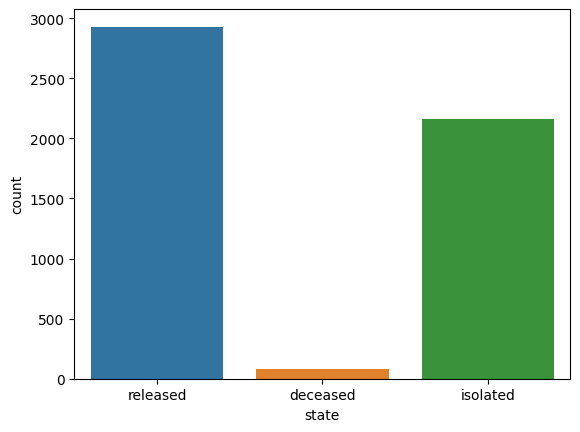

In [ ]:
sns.countplot(x='state', data=merge);pyplot.show()

## REPLACE MISSING VALUE

In [ ]:
merge.describe()

,age,fp_num,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
count,5165.000000,3048.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5098.000000,5100.000000
mean,29.581801,29731.754122,12.184588,7.445098,17.590941,0.478941,5.585294,216.688898,64.868667
std,24.860169,7068.549522,7.220171,7.593768,7.440949,3.639822,2.069593,92.307107,16.864510
min,0.000000,10121.550000,-8.300000,-11.800000,-4.900000,0.000000,1.800000,20.000000,17.900000
25%,0.000000,29118.116667,6.100000,1.200000,11.100000,0.000000,4.200000,160.000000,53.300000
50%,30.000000,30869.733333,9.600000,5.100000,16.100000,0.000000,5.100000,250.000000,68.300000
75%,50.000000,33632.019277,18.500000,14.000000,23.600000,0.000000,6.300000,290.000000,78.300000
max,100.000000,64275.533333,29.500000,25.700000,35.400000,99.200000,14.200000,360.000000,99.900000


In [ ]:
merge.min()

age                             0
fp_num                    10121.5
avg_temp                     -8.3
min_temp                    -11.8
max_temp                     -4.9
precipitation                   0
max_wind_speed                1.8
most_wind_direction            20
avg_relative_humidity        17.9
state                    deceased
dtype: object

In [ ]:
# merge['date'].fillna(value=pd.to_datetime('1/1/2015'), inplace=True)
# merge['symptom_onset_date'].fillna(value=pd.to_datetime('1/1/2015'), inplace=True)
# merge

In [ ]:
from numpy import nan 
merge[['symptom_onset_date']] = merge[['symptom_onset_date']].replace(" ", nan)

In [ ]:
merge['symptom_onset_date'] = merge['symptom_onset_date'].replace(np.nan, '1/1/2020')

In [ ]:
cols = list(merge.columns.values)
merge.to_excel(r'drive/MyDrive/dataset/data_fix.xlsx', index = False)

In [ ]:
merge

,sex,age,city,infection_case,infected_by,contact_number,symptom_onset_date,date,fp_num,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,state
0,male,50,Gangseo-gu,overseas inflow,NaN,75,1/22/2020,1/23/2020,30330.333333,4.6,0.0,9.9,0.0,4.7,290.0,49.3,released
1,male,30,Jungnang-gu,overseas inflow,NaN,31,1/1/2020,1/30/2020,34103.750000,5.2,1.4,10.4,0.0,3.0,70.0,47.0,released
2,male,50,Jongno-gu,contact with patient,2002000001,17,1/1/2020,1/30/2020,30673.416667,5.2,1.4,10.4,0.0,3.0,70.0,47.0,released
3,male,20,Mapo-gu,overseas inflow,NaN,9,1/26/2020,1/30/2020,29269.316667,5.2,1.4,10.4,0.0,3.0,70.0,47.0,released
4,female,20,Seongbuk-gu,contact with patient,1000000002,2,1/1/2020,1/31/2020,30945.433333,3.9,1.4,8.9,0.0,4.4,270.0,59.6,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,female,30,Jeju-do,overseas inflow,NaN,25,1/1/2020,5/30/2020,31536.981520,20.0,17.8,23.6,0.0,5.3,50.0,79.5,released
5161,NaN,0,Jeju-do,overseas inflow,NaN,NaN,1/1/2020,6/16/2020,NaN,23.3,21.4,26.9,0.0,4.4,290.0,82.8,released
5162,NaN,0,Jeju-do,overseas inflow,NaN,72,1/1/2020,6/18/2020,NaN,19.5,18.3,22.5,49.3,7.4,70.0,95.8,isolated
5163,NaN,0,Jeju-do,overseas inflow,NaN,NaN,1/1/2020,6/18/2020,NaN,19.5,18.3,22.5,49.3,7.4,70.0,95.8,isolated


In [ ]:
merge['sex'].replace({'male' : 0}, inplace=True)
merge['sex'].replace({'female' : 1}, inplace=True)
merge['sex'] = merge['sex'].replace(np.nan, -1)
merge['infection_case'] = merge['infection_case'].replace(np.nan, 2)
merge['infected_by'] = merge['infected_by'].replace(np.nan, -1)
merge['contact_number'] = merge['contact_number'].replace(np.nan, -1)
merge['symptom_onset_date'] = pd.to_datetime(merge.symptom_onset_date, format='%m/%d/%Y')
merge['date'] = pd.to_datetime(merge.date, format='%m/%d/%Y')
merge['fp_num'] = merge['fp_num'].replace(np.nan, 11000)
merge['avg_temp'] = merge['avg_temp'].replace(np.nan, -9)
merge['min_temp'] = merge['min_temp'].replace(np.nan, -12)
merge['max_temp'] = merge['max_temp'].replace(np.nan, -6)
merge['precipitation'] = merge['precipitation'].replace(np.nan, -1)
merge['max_wind_speed'] = merge['max_wind_speed'].replace(np.nan, 0)
merge['most_wind_direction'] = merge['most_wind_direction'].replace(np.nan, 0)
merge['avg_relative_humidity'] = merge['avg_relative_humidity'].replace(np.nan, 0)
for col_name in merge.columns:
    if(merge[col_name].dtype == 'object'):
        merge[col_name]= merge[col_name].astype('category')
        merge[col_name] = merge[col_name].cat.codes
merge

,sex,age,city,infection_case,infected_by,contact_number,symptom_onset_date,date,fp_num,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,state
0,0.0,50,39,51,0,80,2020-01-22,2020-01-23,30330.333333,4.6,0.0,9.9,0.0,4.7,290.0,49.3,2
1,0.0,30,93,51,0,43,2020-01-01,2020-01-30,34103.750000,5.2,1.4,10.4,0.0,3.0,70.0,47.0,2
2,0.0,50,91,47,475,23,2020-01-01,2020-01-30,30673.416667,5.2,1.4,10.4,0.0,3.0,70.0,47.0,2
3,0.0,20,95,51,0,87,2020-01-26,2020-01-30,29269.316667,5.2,1.4,10.4,0.0,3.0,70.0,47.0,2
4,1.0,20,124,47,1,28,2020-01-01,2020-01-31,30945.433333,3.9,1.4,8.9,0.0,4.4,270.0,59.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,1.0,30,86,51,0,34,2020-01-01,2020-05-30,31536.981520,20.0,17.8,23.6,0.0,5.3,50.0,79.5,2
5161,-1.0,0,86,51,0,0,2020-01-01,2020-06-16,11000.000000,23.3,21.4,26.9,0.0,4.4,290.0,82.8,2
5162,-1.0,0,86,51,0,78,2020-01-01,2020-06-18,11000.000000,19.5,18.3,22.5,49.3,7.4,70.0,95.8,1
5163,-1.0,0,86,51,0,0,2020-01-01,2020-06-18,11000.000000,19.5,18.3,22.5,49.3,7.4,70.0,95.8,1


## Fiture Engineering

In [ ]:
merge['days']  = merge.date - merge.symptom_onset_date
merge.drop(['symptom_onset_date','date'], inplace=True, axis=1)

merge

,sex,age,city,infection_case,infected_by,contact_number,fp_num,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,state,days
0,0.0,50,39,51,0,80,30330.333333,4.6,0.0,9.9,0.0,4.7,290.0,49.3,2,1 days
1,0.0,30,93,51,0,43,34103.750000,5.2,1.4,10.4,0.0,3.0,70.0,47.0,2,29 days
2,0.0,50,91,47,475,23,30673.416667,5.2,1.4,10.4,0.0,3.0,70.0,47.0,2,29 days
3,0.0,20,95,51,0,87,29269.316667,5.2,1.4,10.4,0.0,3.0,70.0,47.0,2,4 days
4,1.0,20,124,47,1,28,30945.433333,3.9,1.4,8.9,0.0,4.4,270.0,59.6,2,30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,1.0,30,86,51,0,34,31536.981520,20.0,17.8,23.6,0.0,5.3,50.0,79.5,2,150 days
5161,-1.0,0,86,51,0,0,11000.000000,23.3,21.4,26.9,0.0,4.4,290.0,82.8,2,167 days
5162,-1.0,0,86,51,0,78,11000.000000,19.5,18.3,22.5,49.3,7.4,70.0,95.8,1,169 days
5163,-1.0,0,86,51,0,0,11000.000000,19.5,18.3,22.5,49.3,7.4,70.0,95.8,1,169 days


In [ ]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 0 to 5164
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   sex                    5165 non-null   float64        
 1   age                    5165 non-null   int64          
 2   city                   5165 non-null   int16          
 3   infection_case         5165 non-null   int8           
 4   infected_by            5165 non-null   int16          
 5   contact_number         5165 non-null   int8           
 6   fp_num                 5165 non-null   float64        
 7   avg_temp               5165 non-null   float64        
 8   min_temp               5165 non-null   float64        
 9   max_temp               5165 non-null   float64        
 10  precipitation          5165 non-null   float64        
 11  max_wind_speed         5165 non-null   float64        
 12  most_wind_direction    5165 non-null   float64  

In [ ]:
merge.columns

Index(['sex', 'age', 'city', 'infection_case', 'infected_by', 'contact_number',
       'fp_num', 'avg_temp', 'min_temp', 'max_temp', 'precipitation',
       'max_wind_speed', 'most_wind_direction', 'avg_relative_humidity',
       'state', 'days'],
      dtype='object')

In [ ]:
merge = merge [['sex', 'age', 'city', 'infection_case', 'infected_by', 'contact_number', 'days',
       'fp_num', 'avg_temp', 'min_temp', 'max_temp', 'precipitation',
       'max_wind_speed', 'most_wind_direction', 'avg_relative_humidity', 
       'state']]
merge.head()

,sex,age,city,infection_case,infected_by,contact_number,days,fp_num,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,state
0,0.0,50,39,51,0,80,1 days,30330.333333,4.6,0.0,9.9,0.0,4.7,290.0,49.3,2
1,0.0,30,93,51,0,43,29 days,34103.750000,5.2,1.4,10.4,0.0,3.0,70.0,47.0,2
2,0.0,50,91,47,475,23,29 days,30673.416667,5.2,1.4,10.4,0.0,3.0,70.0,47.0,2
3,0.0,20,95,51,0,87,4 days,29269.316667,5.2,1.4,10.4,0.0,3.0,70.0,47.0,2
4,1.0,20,124,47,1,28,30 days,30945.433333,3.9,1.4,8.9,0.0,4.4,270.0,59.6,2


In [ ]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 0 to 5164
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   sex                    5165 non-null   float64        
 1   age                    5165 non-null   int64          
 2   city                   5165 non-null   int16          
 3   infection_case         5165 non-null   int8           
 4   infected_by            5165 non-null   int16          
 5   contact_number         5165 non-null   int8           
 6   days                   5162 non-null   timedelta64[ns]
 7   fp_num                 5165 non-null   float64        
 8   avg_temp               5165 non-null   float64        
 9   min_temp               5165 non-null   float64        
 10  max_temp               5165 non-null   float64        
 11  precipitation          5165 non-null   float64        
 12  max_wind_speed         5165 non-null   float64  

## Label Endcoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merge['sex']=le.fit_transform(merge['sex'])
merge['age']=le.fit_transform(merge['age'])
merge['city']=le.fit_transform(merge['city'])
merge['infection_case']=le.fit_transform(merge['infection_case'])
merge['infected_by']=le.fit_transform(merge['infected_by'])
merge['contact_number']=le.fit_transform(merge['contact_number'])
merge['days']=le.fit_transform(merge['days'])
merge['fp_num']=le.fit_transform(merge['fp_num'])
merge['avg_temp']=le.fit_transform(merge['avg_temp'])
merge['min_temp']=le.fit_transform(merge['min_temp'])
merge['max_temp']=le.fit_transform(merge['max_temp'])
merge['precipitation']=le.fit_transform(merge['precipitation'])
merge['max_wind_speed']=le.fit_transform(merge['max_wind_speed'])
merge['most_wind_direction']=le.fit_transform(merge['most_wind_direction'])
merge['avg_relative_humidity']=le.fit_transform(merge['avg_relative_humidity'])
merge

,sex,age,city,infection_case,infected_by,contact_number,days,fp_num,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,state
0,1,5,40,51,0,80,4,368,38,48,48,1,27,13,113,2
1,1,3,94,51,0,43,24,701,44,61,53,1,10,3,97,2
2,1,5,92,47,475,23,24,404,44,61,53,1,10,3,97,2
3,1,2,96,51,0,87,7,283,44,61,53,1,10,3,97,2
4,2,2,125,47,1,28,25,438,32,61,38,1,24,12,181,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,2,3,87,51,0,34,140,477,184,215,183,1,33,2,319,2
5161,0,0,87,51,0,0,157,1,216,249,214,1,24,13,341,2
5162,0,0,87,51,0,78,159,1,180,220,172,35,54,3,405,1
5163,0,0,87,51,0,0,159,1,180,220,172,35,54,3,405,1


## Fiture Correlation

Text(0.5, 1.0, 'Feature Correlation')

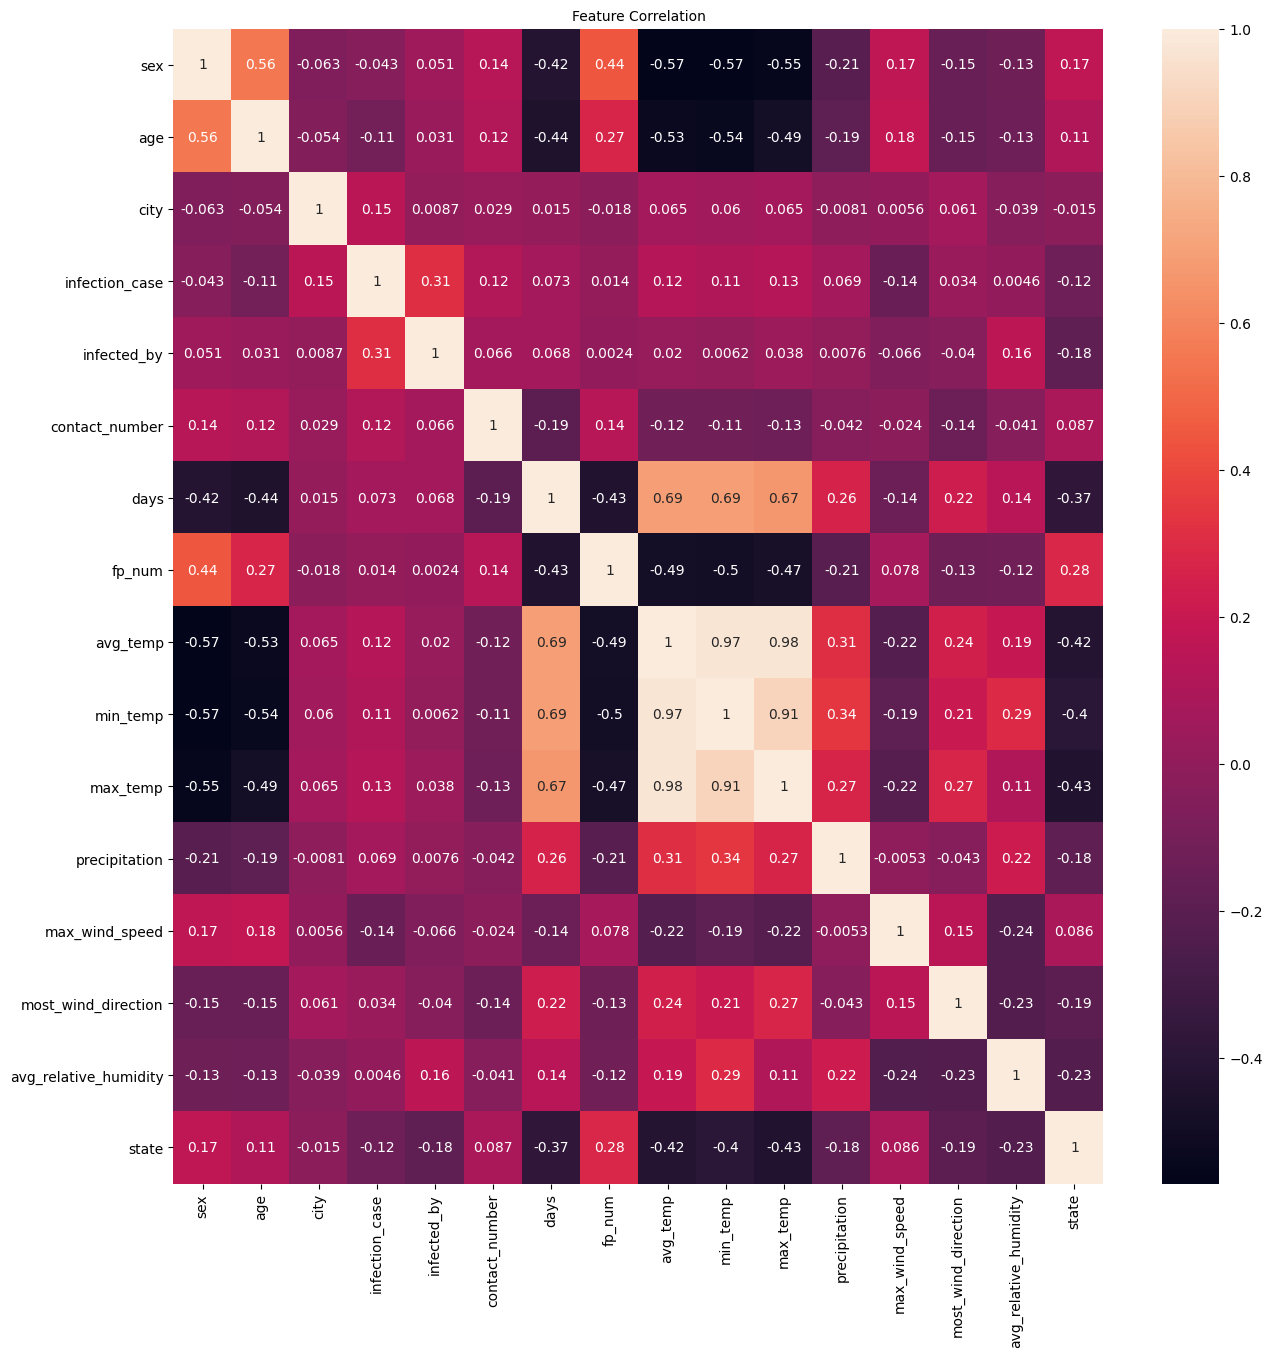

In [ ]:
pyplot.figure(figsize=(15,15))
corr=merge.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
pyplot.title('Feature Correlation', y = 1.0, size=10)

In [ ]:
merge.columns

Index(['sex', 'age', 'city', 'infection_case', 'infected_by', 'contact_number',
       'days', 'fp_num', 'avg_temp', 'min_temp', 'max_temp', 'precipitation',
       'max_wind_speed', 'most_wind_direction', 'avg_relative_humidity',
       'state'],
      dtype='object')

In [ ]:
fiture_cols = ['sex', 'age', 'city', 'infection_case', 'infected_by', 'contact_number',
       'days', 'fp_num', 'avg_temp', 'min_temp', 'max_temp', 'precipitation',
       'max_wind_speed', 'most_wind_direction', 'avg_relative_humidity']
X = merge[fiture_cols]
Y = merge.state

## Cross Validation

In [ ]:
test_size = 0.2
seed = 5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Model

# Decision Tree

              precision    recall  f1-score   support

           0       0.32      0.60      0.41        10
           1       0.86      0.90      0.88       435
           2       0.92      0.87      0.89       588

    accuracy                           0.88      1033
   macro avg       0.70      0.79      0.73      1033
weighted avg       0.89      0.88      0.88      1033

[[  6   1   3]
 [  1 391  43]
 [ 12  63 513]]
Accuracy Decision Tree: 84.79714835139063
ROC AUC score dt: 85.51742162632654
Recall of dt is:  88.09293320425944
Precision of dt is: 88.73036565892042
Confusion Matrix : 
 AxesSubplot(0.125,0.11;0.62x0.77)


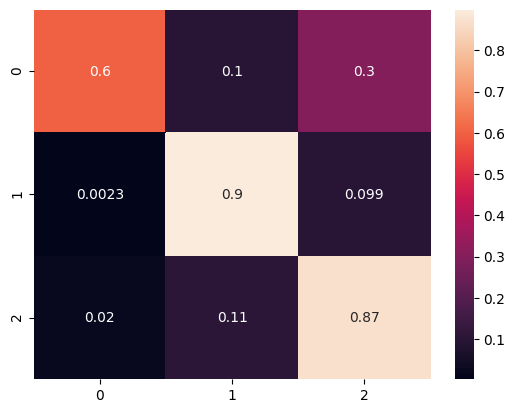

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
predicted = dt.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(report)
print(matrix)

scoring = 'accuracy'
akurasi_dt = cross_val_score(dt, X_test, Y_test, cv=seed, scoring=scoring) *100

from sklearn.metrics import roc_auc_score

print("Accuracy Decision Tree: {}".format((akurasi_dt.mean()))) 
auc_dt = roc_auc_score(Y_test, dt.predict_proba(X_test), multi_class='ovo', average='weighted') *100
print('ROC AUC score dt:', auc_dt)

recall_dt=recall_score(Y_test,predicted, average='weighted')*100
print("Recall of dt is: ",recall_dt)
prec_dt=precision_score(Y_test,predicted, average='weighted')*100
print("Precision of dt is:",prec_dt)

print ("Confusion Matrix : \n",sns.heatmap(confusion_matrix(Y_test, predicted, normalize='true'), annot = True))

# Naive Bayes

              precision    recall  f1-score   support

           0       0.10      0.90      0.18        10
           1       0.69      0.56      0.62       435
           2       0.71      0.72      0.71       588

    accuracy                           0.65      1033
   macro avg       0.50      0.72      0.50      1033
weighted avg       0.70      0.65      0.67      1033

[[  9   0   1]
 [ 21 242 172]
 [ 60 107 421]]
Akurasi Naive Bayes: 45.38342479245814
ROC AUC score Naive Bayes: 83.49576144173996
Recall of Naive Bayes is:  65.05324298160697
Precision of Naive Bayes is: 69.63995281411658
Confusion Matrix : 
 AxesSubplot(0.125,0.11;0.62x0.77)


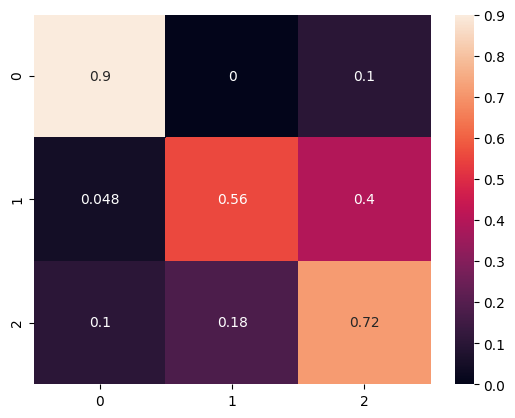

In [ ]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
predicted = nb.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(report)
print(matrix)

scoring = 'accuracy'
akurasi_nb = cross_val_score(nb, X_test, Y_test, cv=seed, scoring=scoring) *100

from sklearn.metrics import roc_auc_score

print("Akurasi Naive Bayes: {}".format((akurasi_nb.mean()))) 
auc_nb = roc_auc_score(Y_test, nb.predict_proba(X_test), multi_class='ovo', average='weighted') *100
print('ROC AUC score Naive Bayes:', auc_nb)
recall_nb=recall_score(Y_test,predicted, average='weighted')*100
print("Recall of Naive Bayes is: ",recall_nb)
prec_nb=precision_score(Y_test,predicted, average='weighted')*100
print("Precision of Naive Bayes is:",prec_nb)
print ("Confusion Matrix : \n",sns.heatmap(confusion_matrix(Y_test, predicted, normalize='true'), annot = True))

# Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.66      0.63      0.65       435
           2       0.72      0.76      0.74       588

    accuracy                           0.70      1033
   macro avg       0.46      0.46      0.46      1033
weighted avg       0.69      0.70      0.69      1033

[[  0   0  10]
 [  0 275 160]
 [  0 142 446]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/met

Akurasi Logistic Regresion: 71.150039866798
ROC AUC score Logistic Regresion: 76.49688249302459
Recall of Logistic Regresion is:  69.79670861568248
Precision of Logistic Regresion is: 68.98332781455905
Confusion Matrix : 
 AxesSubplot(0.125,0.11;0.62x0.77)


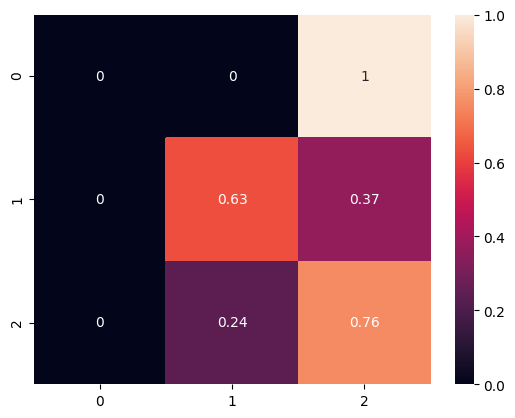

In [ ]:
log = LogisticRegression()
log.fit(X_train, Y_train)
predicted = log.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(report)
print(matrix)

scoring = 'accuracy'
akurasi_log = cross_val_score(log, X_test, Y_test, cv=seed, scoring=scoring) *100

from sklearn.metrics import roc_auc_score

print("Akurasi Logistic Regresion: {}".format((akurasi_log.mean()))) 
auc_log = roc_auc_score(Y_test, log.predict_proba(X_test), multi_class='ovo', average='weighted') *100
print('ROC AUC score Logistic Regresion:', auc_log)
recall_log=recall_score(Y_test,predicted, average='weighted')*100
print("Recall of Logistic Regresion is: ",recall_log)
prec_log=precision_score(Y_test,predicted, average='weighted') *100
print("Precision of Logistic Regresion is:",prec_log)
print ("Confusion Matrix : \n",sns.heatmap(confusion_matrix(Y_test, predicted, normalize='true'), annot = True))

# Random Forest

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.88      0.92      0.90       435
           2       0.94      0.91      0.92       588

    accuracy                           0.91      1033
   macro avg       0.89      0.81      0.84      1033
weighted avg       0.91      0.91      0.91      1033

[[  6   1   3]
 [  0 401  34]
 [  1  53 534]]
Akurasi Random Forest: 88.08967684442567
ROC AUC score Random Forest: 94.73539752216271
Recall of Random Forest is:  91.09390125847048
Precision of Random Forest is: 91.1755545753067
Confusion Matrix : 
 AxesSubplot(0.125,0.11;0.62x0.77)


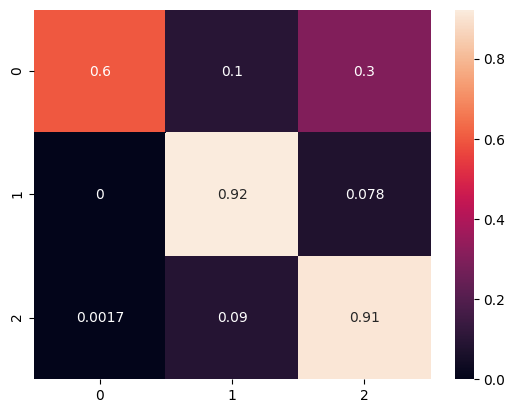

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
predicted = rf.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(report)
print(matrix)

scoring = 'accuracy'
akurasi_rf = cross_val_score(rf, X_test, Y_test, cv=seed, scoring=scoring) *100

from sklearn.metrics import roc_auc_score

print("Akurasi Random Forest: {}".format((akurasi_rf.mean()))) 
auc_rf = roc_auc_score(Y_test, rf.predict_proba(X_test), multi_class='ovo', average='weighted') *100
print('ROC AUC score Random Forest:', auc_rf)
recall_rf=recall_score(Y_test,predicted, average='weighted')*100
print("Recall of Random Forest is: ",recall_rf)
prec_rf=precision_score(Y_test,predicted, average='weighted')*100
print("Precision of Random Forest is:",prec_rf)
print ("Confusion Matrix : \n",sns.heatmap(confusion_matrix(Y_test, predicted, normalize='true'), annot = True))


# KNN

              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.83      0.77      0.80       435
           2       0.83      0.88      0.86       588

    accuracy                           0.83      1033
   macro avg       0.82      0.68      0.73      1033
weighted avg       0.83      0.83      0.83      1033

[[  4   0   6]
 [  0 336  99]
 [  1  69 518]]

Akurasi KNN: 78.12063224051404
ROC AUC score KNN: 86.73494083015586
Recall of KNN is:  83.05905130687319
Precision of KNN is: 83.03850583672634
Confusion Matrix : 
 AxesSubplot(0.125,0.11;0.62x0.77)


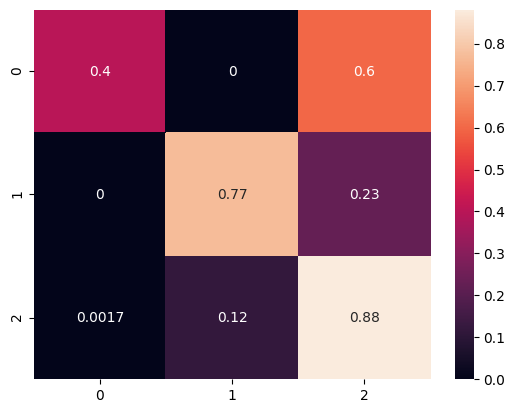

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predicted = knn.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(report)
print(matrix)

scoring = 'accuracy'
akurasi_knn = cross_val_score(knn, X_test, Y_test, cv=seed, scoring=scoring) *100
print("\nAkurasi KNN: {}".format((akurasi_knn.mean()))) 
auc_knn = roc_auc_score(Y_test, knn.predict_proba(X_test), multi_class='ovo', average='weighted') *100
print('ROC AUC score KNN:', auc_knn)
recall_knn=recall_score(Y_test,predicted, average='weighted')*100
print("Recall of KNN is: ",recall_knn)
prec_knn=precision_score(Y_test,predicted, average='weighted')*100
print("Precision of KNN is:",prec_knn)
print ("Confusion Matrix : \n",sns.heatmap(confusion_matrix(Y_test, predicted, normalize='true'), annot = True))

# Light Gradient Boost

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.91      0.92      0.92       435
           2       0.94      0.93      0.93       588

    accuracy                           0.92      1033
   macro avg       0.87      0.82      0.84      1033
weighted avg       0.92      0.92      0.92      1033

[[  6   0   4]
 [  0 401  34]
 [  2  39 547]]
Accuracy Light Gradient Boosting: 90.02673420571269
ROC AUC score LGBM: 96.65858620712362
Recall of LGBM is:  92.35237173281703
Precision of LGBM is: 92.32800677863602
Confusion Matrix : 
 AxesSubplot(0.125,0.11;0.62x0.77)


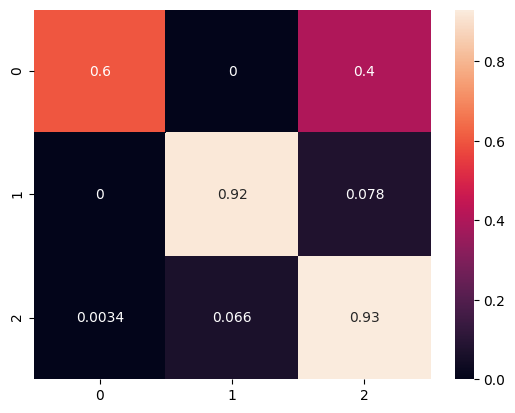

In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, Y_train)
predicted = lgbm.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(report)
print(matrix)

scoring = 'accuracy'
akurasi_lgbm = cross_val_score(lgbm, X_test, Y_test, cv=seed, scoring=scoring) *100

from sklearn.metrics import roc_auc_score

print("Accuracy Light Gradient Boosting: {}".format((akurasi_lgbm.mean()))) 
auc_lgbm = roc_auc_score(Y_test, lgbm.predict_proba(X_test), multi_class='ovo', average='weighted') *100
print('ROC AUC score LGBM:', auc_lgbm)

recall_lgbm=recall_score(Y_test,predicted, average='weighted')*100
print("Recall of LGBM is: ",recall_lgbm)
prec_lgbm=precision_score(Y_test,predicted, average='weighted')*100
print("Precision of LGBM is:",prec_lgbm)

print ("Confusion Matrix : \n",sns.heatmap(confusion_matrix(Y_test, predicted, normalize='true'), annot = True))

In [ ]:
lgbm.fit(X_train, Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# HASIL AKURASI

In [ ]:
algos=["Decision Tree","Naive Bayes","Logistic Regression","Random Forest","KNN","Light Gradient Boost"]
acc=[akurasi_dt.mean(), akurasi_nb.mean(), akurasi_log.mean(),akurasi_rf.mean(),akurasi_knn.mean(),akurasi_lgbm.mean()]
auc=[auc_dt, auc_nb, auc_log,  auc_rf, auc_knn, auc_lgbm]
recall=[recall_dt, recall_nb, recall_log,  recall_rf, recall_knn, recall_lgbm]
prec=[prec_dt, prec_nb, prec_log,  prec_rf, prec_knn, prec_lgbm]

comp={"Algorithms":algos,"Accuracies":acc,"AUC":auc,"Recall":recall,"Precision":prec}
compdf=pd.DataFrame(comp)
display(compdf.sort_values(by=["Accuracies","AUC","Recall","Precision"], ascending=False))

,Algorithms,Accuracies,AUC,Recall,Precision
5,Light Gradient Boost,90.026734,96.658586,92.352372,92.328007
3,Random Forest,88.089677,94.735398,91.093901,91.175555
0,Decision Tree,84.797148,85.517422,88.092933,88.730366
4,KNN,78.120632,86.734941,83.059051,83.038506
2,Logistic Regression,71.150040,76.496882,69.796709,68.983328
1,Naive Bayes,45.383425,83.495761,65.053243,69.639953


#Hyperparameter Tunning LGBM

In [ ]:
import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV

optimized_lgbm = lgbm.LGBMRegressor()                                                            
optimized_lgbm.fit(X_train, Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
param = {
        'n_estimators': (100, 400, 10),
        'min_child_weight': (3, 20, 2),
        'colsample_bytree': (0.4, 1.0),
        'max_depth': (5, 15, 2),
        'min_child_samples': (10, 30)}
        
grid = GridSearchCV(optimized_lgbm, param_grid = param, cv=5)

grid.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': (0.4, 1.0),
                         'max_depth': (5, 15, 2), 'min_child_samples': (10, 30),
                         'min_child_weight

In [ ]:
predicted1 = grid.predict(X_test)
predicted1
X_test.shape

(1033, 15)

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.91      0.92      0.92       435
           2       0.94      0.93      0.93       588

    accuracy                           0.92      1033
   macro avg       0.87      0.82      0.84      1033
weighted avg       0.92      0.92      0.92      1033

[[  6   0   4]
 [  0 401  34]
 [  2  39 547]]
Accuracy Light Gradient Boosting after tuning: 90.02673420571269
ROC AUC score LGBM: 96.56527745197695
Recall of LGBM is after tuning:  92.35237173281703
Precision of LGBM is after tuning: 92.32800677863602
Confusion Matrix : 
 AxesSubplot(0.125,0.11;0.62x0.77)


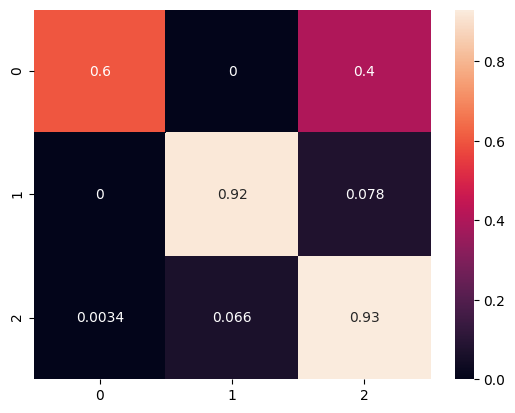

In [ ]:
lgbm_tuning = LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0)
lgbm_tuning.fit(X_train, Y_train)
predicted = lgbm_tuning.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(report)
print(matrix)

akurasi_lgbm = cross_val_score(lgbm_tuning, X_test, Y_test, cv=seed, scoring='accuracy') *100

from sklearn.metrics import roc_auc_score

print("Accuracy Light Gradient Boosting after tuning: {}".format((akurasi_lgbm.mean()))) 
auc_lgbm = roc_auc_score(Y_test, lgbm_tuning.predict_proba(X_test), multi_class='ovo') *100
print('ROC AUC score LGBM:', auc_lgbm)

recall_lgbm=recall_score(Y_test,predicted, average='weighted')*100
print("Recall of LGBM is after tuning: ",recall_lgbm)
prec_lgbm=precision_score(Y_test,predicted, average='weighted')*100
print("Precision of LGBM is after tuning:",prec_lgbm)

print ("Confusion Matrix : \n",sns.heatmap(confusion_matrix(Y_test, predicted, normalize='true'), annot = True))

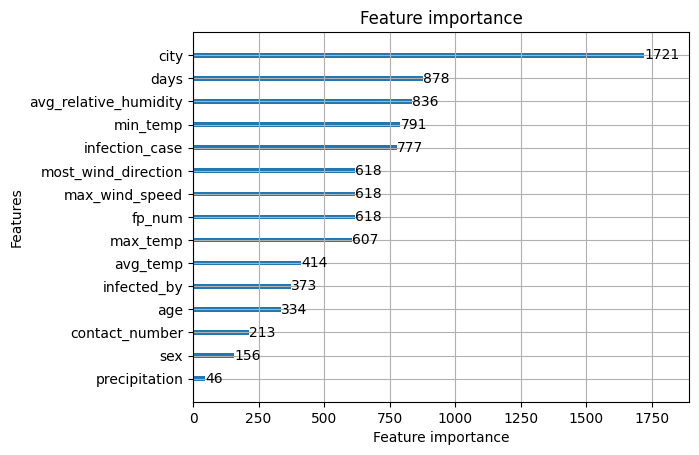

In [ ]:
from lightgbm import plot_importance
plot_importance(lgbm_tuning)
pyplot.show()